# Cleaning the data

## Description:


Data cleaning is the process of fixing or removing incorrect, corrupted, duplicate, or incomplete
data within a dataset. Messy data leads to unreliable outcomes. Cleaning data is an essential
part of data analysis, and demonstrating your data cleaning skills is key to landing a job. Here
are some projects to test out your data cleaning skills: 

## Key Concepts and Challenges:

Data Integrity: Ensuring the accuracy, consistency, and reliability of data throughout the
cleaning process.

Missing Data Handling: Dealing with missing values by either imputing them or making
informed decisions on how to handle gaps in the dataset.

Duplicate Removal: Identifying and eliminating duplicate records to maintain data
uniqueness.

Standardization: Consistent formatting and units across the dataset for accurate analysis.

Outlier Detection: Identifying and addressing outliers that may skew analysis or model
performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C://Users//srivi//Downloads//archive (2)//AB_NYC_2019.csv")

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
print("Initial shape:", df.shape)
print("Missing values before cleaning:\n", df.isnull().sum())

Initial shape: (48895, 16)
Missing values before cleaning:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [6]:
print("\nData Types:\n", df.dtypes)
print("\nDuplicate rows:", df.duplicated().sum())


Data Types:
 id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Duplicate rows: 0


### Missing Data Handling

In [7]:
df['name'].fillna("Unknown", inplace=True)
df['host_name'].fillna("Unknown Host", inplace=True)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['reviews_per_month'].fillna(0, inplace=True)

In [8]:
df.head(7)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0


In [9]:
df['last_review'].fillna(method='ffill', inplace=True)

In [11]:
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


### Duplicate Removal

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [14]:
print("\nData Types:\n", df.dtypes)


Data Types:
 id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object


### Standardization

In [15]:
df = df.apply(lambda x: x.str.lower().str.strip() if x.dtype == "object" else x)

In [16]:
df.head(6)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean & quiet apt home by the park,2787,john,brooklyn,kensington,40.64749,-73.97237,private room,149,1,9,2018-10-19,0.21,6,365
1,2595,skylit midtown castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,the village of harlem....new york !,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private room,150,3,0,2019-05-21,0.00,1,365
3,3831,cozy entire floor of brownstone,4869,lisaroxanne,brooklyn,clinton hill,40.68514,-73.95976,entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,entire apt: spacious studio/loft by central park,7192,laura,manhattan,east harlem,40.79851,-73.94399,entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,large cozy 1 br apartment in midtown east,7322,chris,manhattan,murray hill,40.74767,-73.97500,entire home/apt,200,3,74,2019-06-22,0.59,1,129


### Outlier Detection

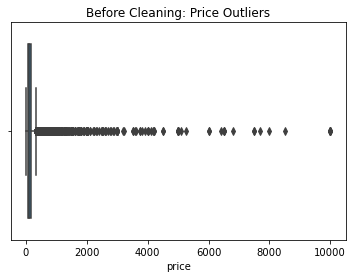

price: Removed 2972 outliers
minimum_nights: Removed 6185 outliers
reviews_per_month: Removed 1921 outliers


In [17]:
sns.boxplot(x=df['price'])
plt.title("Before Cleaning: Price Outliers")
plt.show()

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    cleaned_df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    print(f"{column}: Removed {df.shape[0] - cleaned_df.shape[0]} outliers")
    return cleaned_df

df = remove_outliers_iqr(df, 'price')
df = remove_outliers_iqr(df, 'minimum_nights')
df = remove_outliers_iqr(df, 'reviews_per_month')

In [18]:
print("\nAfter cleaning:")
print("Shape:", df.shape)
print("Duplicate rows:", df.duplicated().sum())
print("Missing values:", df.isnull().sum().sum())


After cleaning:
Shape: (37817, 16)
Duplicate rows: 0
Missing values: 0


In [19]:
df.to_csv("C://Users//srivi//Downloads//AB_NYC_2019_Cleaned.csv", index=False)
print("\n Cleaned dataset saved as 'AB_NYC_2019_Cleaned.csv'")


 Cleaned dataset saved as 'AB_NYC_2019_Cleaned.csv'


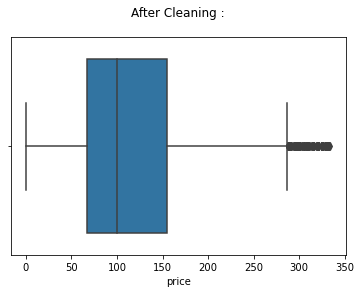

In [21]:
sns.boxplot(x=df['price'])
plt.title("After Cleaning :\n")
plt.show()

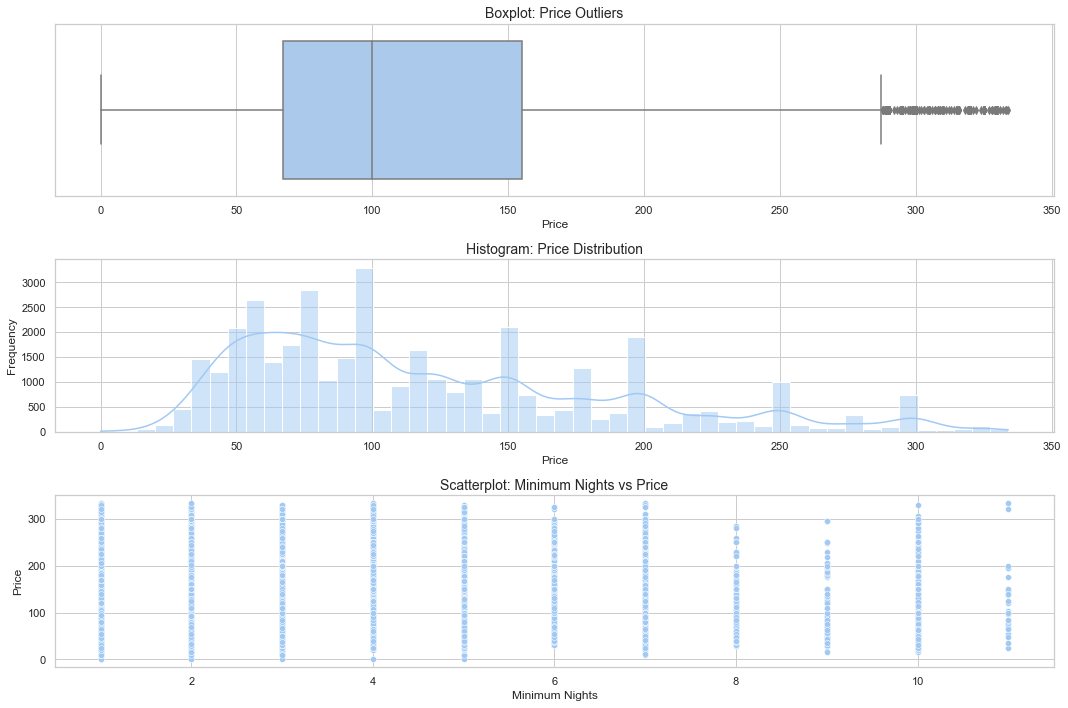

In [22]:
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
sns.boxplot(x=df['price'])
plt.title("Boxplot: Price Outliers", fontsize=14)
plt.xlabel("Price")

plt.subplot(3, 1, 2)
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Histogram: Price Distribution", fontsize=14)
plt.xlabel("Price")
plt.ylabel("Frequency")

plt.subplot(3, 1, 3)
sns.scatterplot(x='minimum_nights', y='price', data=df)
plt.title("Scatterplot: Minimum Nights vs Price", fontsize=14)
plt.xlabel("Minimum Nights")
plt.ylabel("Price")

plt.tight_layout()
plt.show()
